# Identifying stock group leaders from MST visualisations

##  Introduction

In this notebook, Minimum Spanning Tree visualisations are used on 5 years worth of stock data, to explore the relationships between stock groups. Minimum Spanning Tree visualisations can reveal how stock groups tend to correlate within categories such as techonology, aligning with general knowledge that stocks have a tendency to follow leaders in the same category. 

The standard approach [^1] to measuring correlation to build a MST is used. Firstly, the log return of assets r<sub>i</sub>(t) of asset <em>i</em> at time t and r<sub>i</sub>(t) = log P<sub>i</sub>(t) - log P<sub>i</sub>(t-1). 
Secondly, compute the Pearson product-moment correlation matrix of stocks. Thirdly, compute the distance matrix from the correlation matrix. From the distance matrix, we create the Minimum Spanning Tree (MST) matrix.

In [1]:
from data import download_stock_dfs, build_mst, show_graph_with_labels, plot_mst_from_dfs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

In [2]:
sample_stocks = ['SPY', 'AAPL', 'MSFT', 'MS', 'TWTR', 'NOK', 'M', 'DAL', 'T', 'VALE', 'GE', 
                 'AMD', 'UAL', 'F', 'XOM', 'TSM', 'MU', 'UAA', 'VIPS', 'HL', 'NVDA', 'JNJ']
dfs = download_stock_dfs(sample_stocks)

[*********************100%***********************]  22 of 22 completed


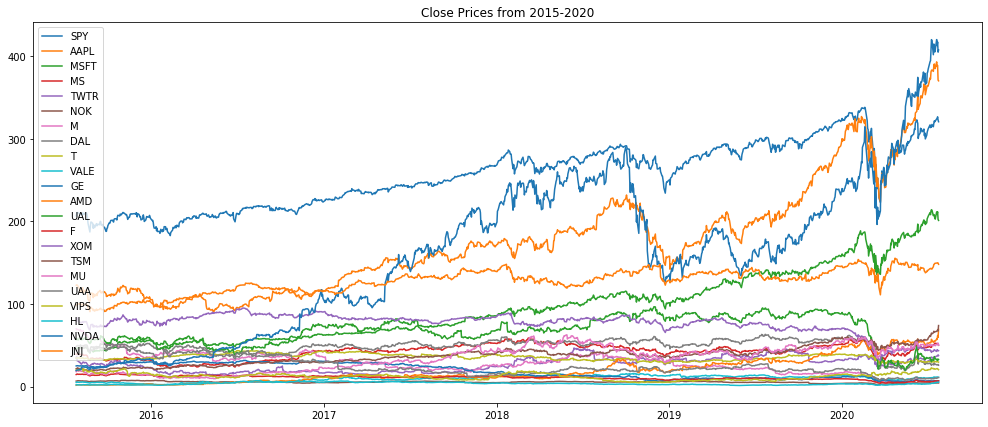

In [3]:
plt.figure(figsize=(17,7))
for stock in sample_stocks:
    plt.plot(dfs[stock, 'Close'] )
plt.title("Close Prices from 2015-2020")
plt.legend(sample_stocks, loc='upper left')
plt.show()

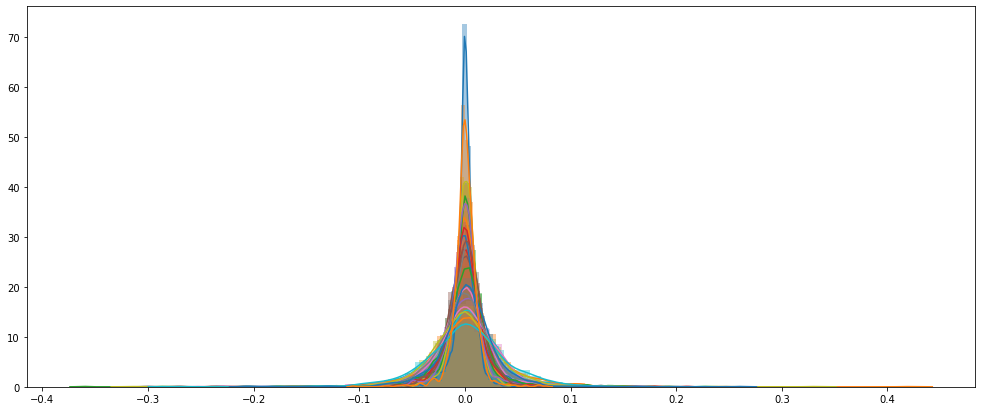

In [4]:
plt.figure(figsize=(17,7))
log_returns= []
for stock in sample_stocks:
    dfs[stock, 'logReturn'] = np.log(dfs[stock, 'Close']) - np.log(dfs[stock, 'Close'].shift(1))
    series = np.delete(dfs[stock, 'logReturn'].to_numpy(), 0)
    log_returns.append(series)
    sns.distplot(series);

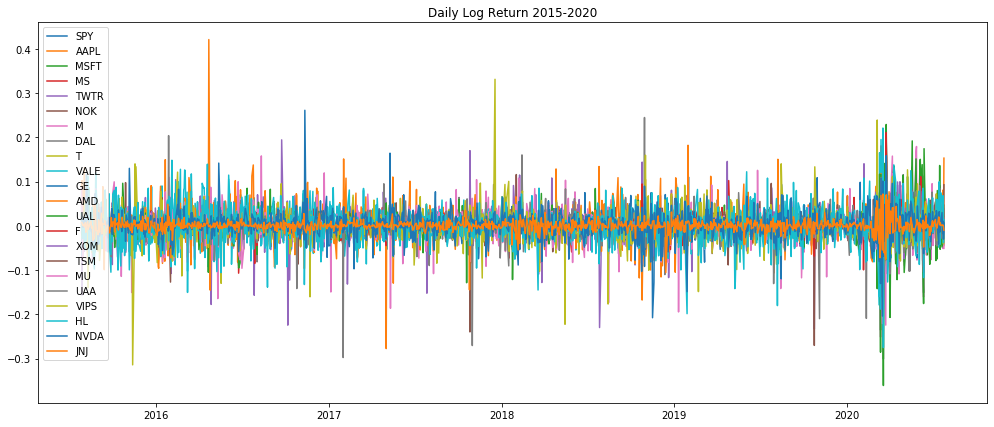

In [5]:
plt.figure(figsize=(17,7))
for stock in sample_stocks:
    plt.plot(dfs[stock, 'logReturn'] )
plt.title("Daily Log Return 2015-2020")
plt.legend(sample_stocks, loc='upper left')
plt.show()


<Figure size 1152x720 with 0 Axes>

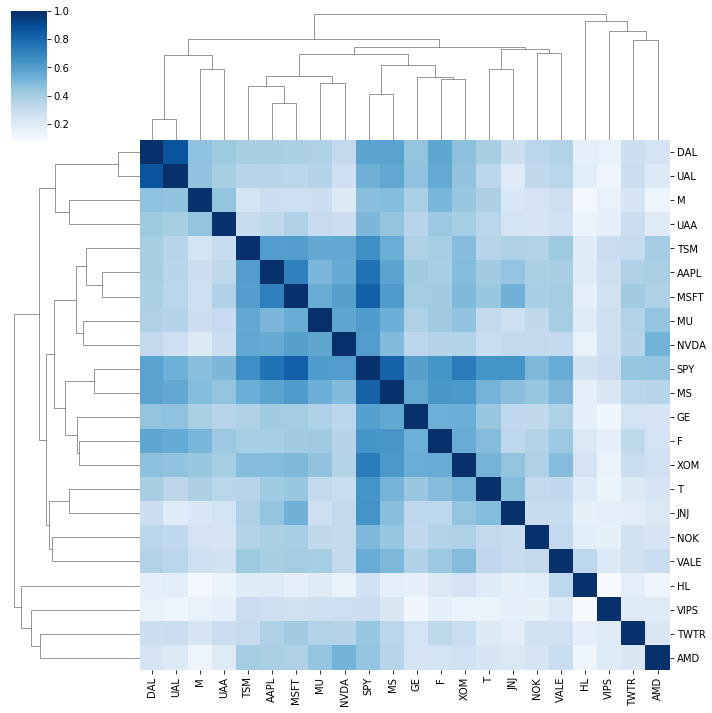

In [6]:
correlation = np.corrcoef(log_returns) 
corr_df = pd.DataFrame(data=correlation, index=sample_stocks, columns=sample_stocks)
plt.figure(figsize=(16, 10))
sns.clustermap(corr_df, cmap="Blues");

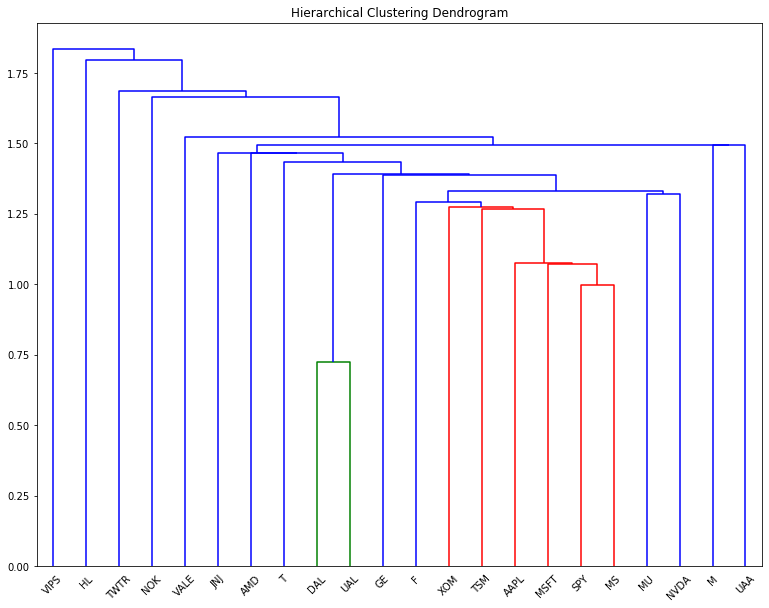

In [7]:
distance = np.sqrt(2.0 * (1.0- correlation)) 
plt.figure(figsize=(13, 10))
plt.title('Hierarchical Clustering Dendrogram')
Z = hierarchy.linkage(distance, 'single')
dn = hierarchy.dendrogram(Z, labels=sample_stocks)
plt.show()

We can call <em>build_mst()</em> on the matrix of distances to create an Minimum Spanning Tree.

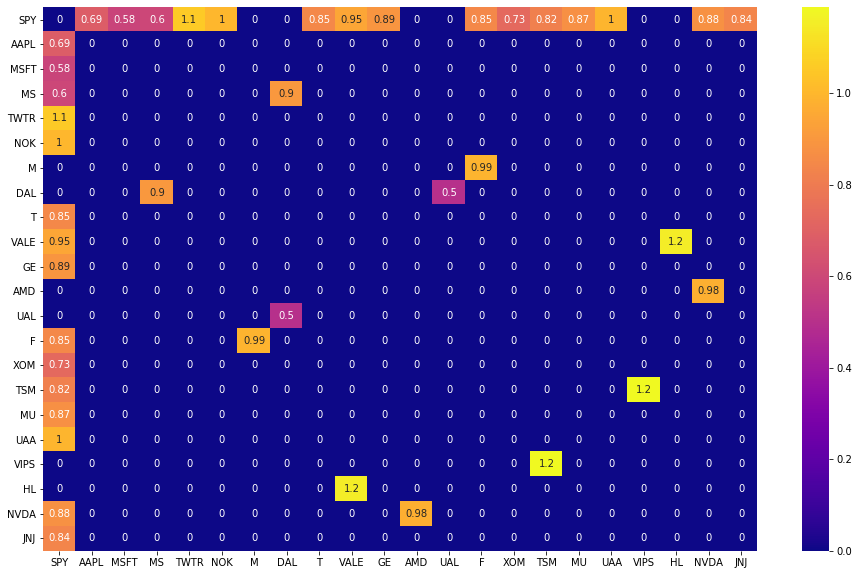

In [9]:
np.fill_diagonal(distance, np.inf) # fill self connections with np.inf to use for comparison
mst = build_mst(distance) # returns a matrix of edges and their values
mst_df = pd.DataFrame(data=mst, index=sample_stocks, columns=sample_stocks)
plt.figure(figsize=(16, 10))
sns.heatmap(mst_df, cmap="plasma", annot = True,);

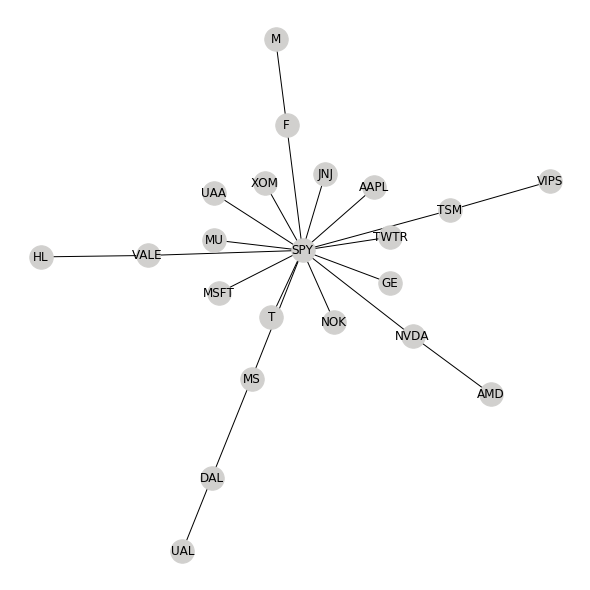

In [10]:
show_graph_with_labels(mst, sample_stocks) #plotting the MST

## Identifying Central Stocks 

As shown in the Minimum Spanning Tree plot above, the SPY ticker is a central node, closely correlating with the other stocks (MSFT, AAPL, GE...). This aligns to the common knowledge that SPY is an aggregate stock of the S&P 500. 

In order to identify the group leaders for this pool of stocks, we should remove SPY ticker from the stocks. 


[*********************100%***********************]  21 of 21 completed


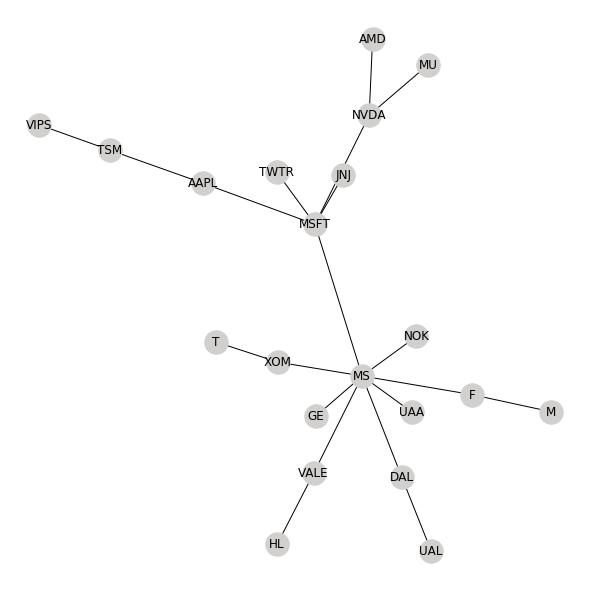

In [11]:
sample_stocks = ['AAPL', 'MSFT', 'MS', 'TWTR', 'NOK', 'M', 'DAL', 'T', 'VALE', 'GE', 
                 'AMD', 'UAL', 'F', 'XOM', 'TSM', 'MU', 'UAA', 'VIPS', 'HL', 'NVDA', 'JNJ']
mst = plot_mst_from_dfs(sample_stocks)
show_graph_with_labels(mst, sample_stocks)

The MST, shown above, aligns with the common knowledge that stocks group together and usually, follow a few leaders. Microsoft MSFT is the stem for tech stocks and Morgan Stanley MS the stem for other companies such as General Electric GE, and UAA. The central node of the technolody stocks is MSFT, for the last 5 years, possibly indicating that MSFT appeals as both as an industry and technology stock. Below, the MST for larger pool of stocks is gathered to analyse how closely stocks correlate and to identify the group leaders. 

In [12]:
sample_stocks2 = [
     'AAPL', 'MSFT', 'MS', 'TWTR', 'NOK', 'M', 'DAL', 'T', 'VALE', 'GE', 'AMD', 'UAL', 'F', 
     'INFY', 'OSTK', 'FB', 'MRO', 'C', 'ZNGA', 'PLUG', 'FCEL', 'FCX', 'ET', 'AA', 'JPM', 'PCG', 'PFE', 
     'BABA', 'CSCO', 'TSLA', 'OXY', 'VZ', 'SEDG', 'SCHW', 'VER', 'DIS', 'EBS', 'KO', 'INO', 'AUY', 
    'XOM', 'TSM', 'MU', 'UAA', 'VIPS', 'HL', 'NVDA', 'JNJ']
mst = plot_mst_from_dfs(sample_stocks2)

[*********************100%***********************]  48 of 48 completed


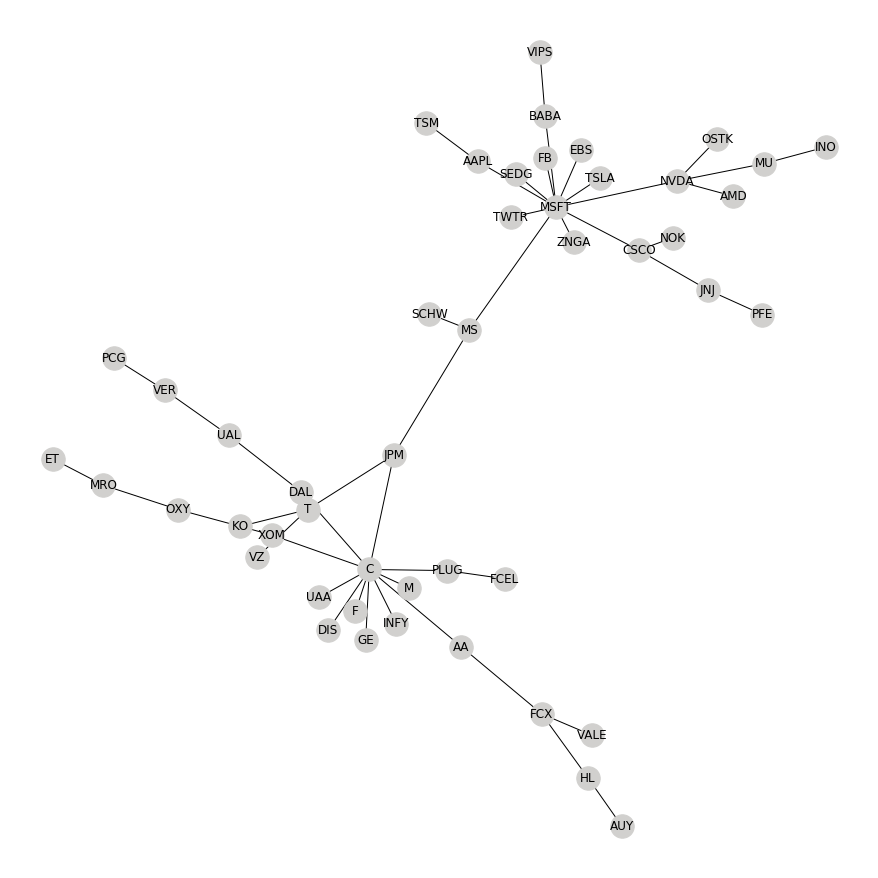

In [13]:
show_graph_with_labels(mst, sample_stocks2)

## Limitations of MST and distance matrix as a indicator of stock behaviour

Generating MST and correlation matrices are useful to map out the relations between stocks. However, the methodology gives soley a general indication and an imperfect measure of how the stocks relate together. Some limitations include:

- Stock group leaders change over time - by sampling the correlation matrix for a 5 year period, we get an average of how correlated stocks were during this period. It would be much more useful to visualize how stocks relationships change over time. 
- It is not explicity clear which are the stock group leaders from soley the Minimum Spanning Tree. The causual relations cannot be inferred (which stock is influencing which). The MST is only useful when cross checked with general knowledge about the stock groups. 

## Conclusion

MST generated on 5 years worth of stock data, can indicate interesting patterns of the relationships between the stocks. However, it is severely limited in showing the causal relations, and which are the stock group leaders. A better method could be to map out the relations changing over time. 

### References

[^1]: https://arxiv.org/pdf/1703.00485.pdf "A review of two decades of correlations, hierarchies, networks and clustering
in financial markets"

[1]: https://arxiv.org/pdf/1703.00485.pdf "A review of two decades of correlations, hierarchies, networks and clustering
in financial markets"